In [1]:
import pandas as pd
from pyspark.sql.functions import col,split,concat,concat_ws,size
import re
import pyspark
import geopandas
import matplotlib.pyplot as plt
from pyspark.sql.types import FloatType


In [2]:
ds = sc.textFile("s3://mukuawsproject/lat_longs.txt")
rdd=ds.map(lambda x: (re.split('[\ ]',x))).cache()
rdd=rdd.filter(lambda x:len(x)<=3)

In [3]:
dfx = sqlContext.createDataFrame(data=rdd)
dfx=dfx.select(concat('_1').alias("latitude"),concat('_2').alias("longitude"),concat('_3').alias("page"))

In [4]:
dfx.show(20)

+-------------------+------------------+--------------------+
|           latitude|         longitude|                page|
+-------------------+------------------+--------------------+
|               36.7| 3.216666666666667|<http://dbpedia.o...|
|               42.5|1.5166666666666666|<http://dbpedia.o...|
| 12.516666666666667|-70.03333333333333|<http://dbpedia.o...|
| -8.833333333333334|13.333333333333334|<http://dbpedia.o...|
| 41.333333333333336|              19.8|<http://dbpedia.o...|
|  34.53333333333333| 69.13333333333334|<http://dbpedia.o...|
| 40.416666666666664|49.833333333333336|<http://dbpedia.o...|
|  39.93333333333333| 32.86666666666667|<http://dbpedia.o...|
|  52.36666666666667|               4.9|<http://dbpedia.o...|
|              50.46|              2.13|<http://dbpedia.o...|
| 17.116666666666667|            -61.85|<http://dbpedia.o...|
|  57.04638888888889| 9.919166666666667|<http://dbpedia.o...|
|              56.15|10.216666666666667|<http://dbpedia.o...|
|       

In [5]:
dfx=dfx.na.drop()

In [6]:
dfx=dfx.filter(dfx.latitude!=0)
dfx=dfx.filter(dfx.longitude!=0)

In [7]:
dfx=dfx.toPandas();
dfx.to_csv('s3://mukuawsproject/DBPedia.csv',header=None)

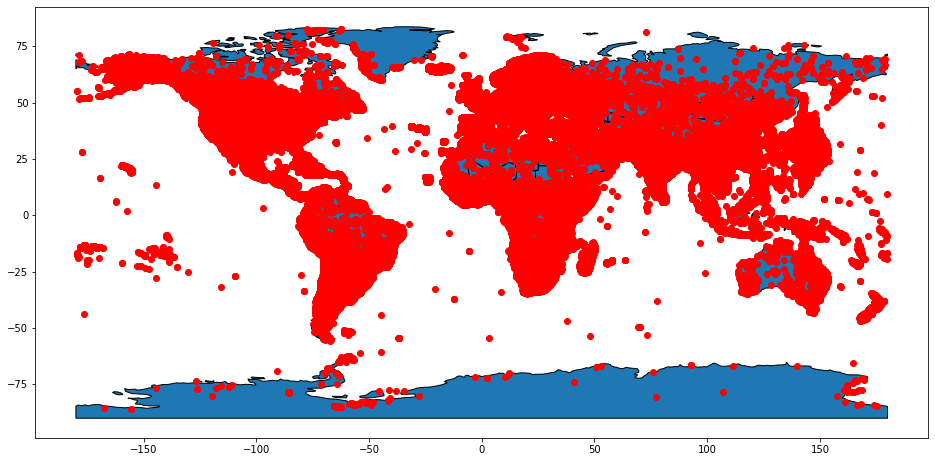

In [8]:
gdf = geopandas.GeoDataFrame(
    dfx, geometry=geopandas.points_from_xy(dfx.longitude, dfx.latitude))


world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world.plot(
    edgecolor='black',figsize=(16,16))

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='red')

plt.show()